# Sports Person Image Classifier
## - Ashwin Prakash

In [ ]:
import numpy as np
import cv2
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline 


In [ ]:
img=cv2.imread('./test_images/sharapova1.jpg')
img.shape # three dimensions , third dimension is for color (R,G,B)

(555, 700, 3)

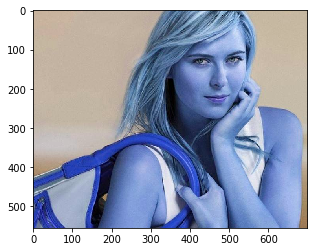

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

In [5]:
gray


array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

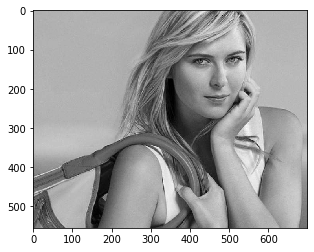

In [6]:
plt.imshow(gray,cmap='gray')

In [7]:

face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]], dtype=int32)

In [8]:
(x,y,w,h)=faces[0]
x,y,w,h

(352, 38, 233, 233)

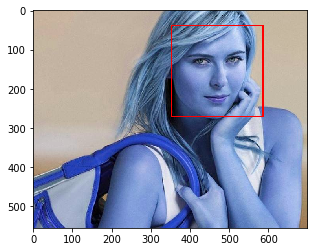

In [9]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

## Crop Faces

<function matplotlib.pyplot.show(*args, **kw)>

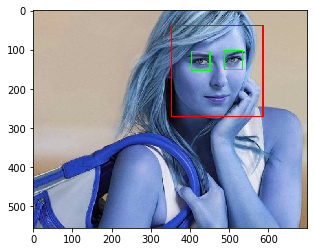

In [10]:

cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show



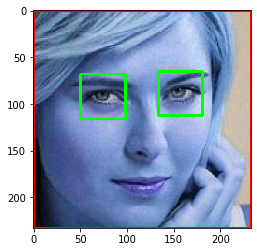

In [11]:
%matplotlib inline 
plt.imshow(roi_color,cmap='gray') #roi=region of interest

In [12]:

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

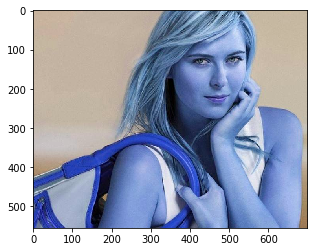

In [13]:
original_image=cv2.imread('./test_images/sharapova1.jpg')
plt.imshow(original_image)

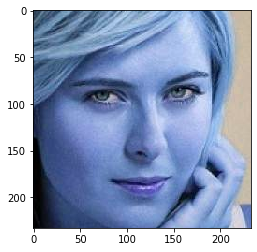

In [14]:
cropped_image=get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
plt.imshow(cropped_image)

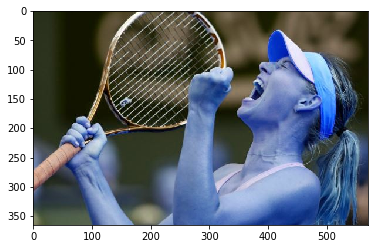

In [15]:
original_image_obstructed=cv2.imread('./test_images/sharapova2.jpg')
plt.imshow(original_image_obstructed)

In [16]:
cropped_image_2=get_cropped_image_if_2_eyes('./test_images/sharapova2.jpg')
cropped_image_2 #image obstructed output nothing 

In [17]:
path_to_data="./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [18]:
# Here we are taking all the path and store in img_dirs

import os 
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [20]:
#if cropped folder is not exist we can create from following code

import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
#splitting the celebrity names from directory
#create the cropped function by using get_cropped_image_if_2_eyes

cropped_image_dirs = []
celebrity_file_names_dict = {}
#here creating the dictionary
#{'lionel messi:['.dataset/cropped/lionel_messi/lionel_messi1.png',
#'.dataset/cropped/lionel_messi/lionel_messi2.png']}'}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/lionel_messi
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/roger_federer
Generating cropped images in folder:  ./dataset/cropped/serena_williams
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


## Wavelet Transformation

In [22]:
import numpy as np
import pywt
import cv2
#from stackoverflow
def w2d(img,mode='haar',level=1):
    imArray=img
    #here doing datatype conversions
    #convert to grayscale
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray=np.float32(imArray)
    imArray /= 255;
    
    #compute coefficients
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    
    #process coefficients
    
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0;
    
    #reconstuction
    
    imArray_H=pywt.waverec2(coeffs_H,mode);
    imArray_H*=255;
    imArray_H=np.uint8(imArray_H)
    
    return imArray_H

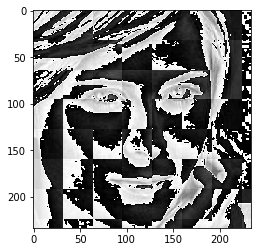

In [23]:
im_har=w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [24]:
celebrity_file_names_dict


{'cropped': [],
 'lionel_messi': ['./dataset/cropped/lionel_messi/lionel_messi1.png',
  './dataset/cropped/lionel_messi/lionel_messi2.png',
  './dataset/cropped/lionel_messi/lionel_messi3.png',
  './dataset/cropped/lionel_messi/lionel_messi4.png',
  './dataset/cropped/lionel_messi/lionel_messi5.png',
  './dataset/cropped/lionel_messi/lionel_messi6.png',
  './dataset/cropped/lionel_messi/lionel_messi7.png',
  './dataset/cropped/lionel_messi/lionel_messi8.png',
  './dataset/cropped/lionel_messi/lionel_messi9.png',
  './dataset/cropped/lionel_messi/lionel_messi10.png',
  './dataset/cropped/lionel_messi/lionel_messi11.png',
  './dataset/cropped/lionel_messi/lionel_messi12.png',
  './dataset/cropped/lionel_messi/lionel_messi13.png',
  './dataset/cropped/lionel_messi/lionel_messi14.png',
  './dataset/cropped/lionel_messi/lionel_messi15.png',
  './dataset/cropped/lionel_messi/lionel_messi16.png',
  './dataset/cropped/lionel_messi/lionel_messi17.png',
  './dataset/cropped/lionel_messi/lionel_m

In [62]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
class_dict

{'cropped': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

In [63]:
celebrity_file_names_dict.keys()

dict_keys(['cropped', 'lionel_messi', 'maria_sharapova', 'roger_federer', 'serena_williams', 'virat_kohli'])

In [26]:
X, y = [], []
        
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue # here we deleted some images so..
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        #here rgb for raw image so 32*32*3
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])         
        

In [27]:
len(X)

186

In [28]:
32*32*3+32*32


4096

In [29]:
len(X[0])

4096

In [30]:
X[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [31]:
X = np.array(X).reshape(len(X),4096).astype(float)
#converted in to float
X.shape

(186, 4096)

In [32]:
X[0]

array([100., 129., 140., ..., 237., 234., 232.])

## First Model Training using SVM


we will use SVM with rbf kernel tuned with heuristic finetuning

In [33]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.8297872340425532

In [35]:
len(X_test)

47

In [36]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       0.89      0.80      0.84        10
           2       0.64      1.00      0.78         7
           3       1.00      0.50      0.67         6
           4       0.80      0.80      0.80        10
           5       0.93      0.93      0.93        14

    accuracy                           0.83        47
   macro avg       0.85      0.81      0.80        47
weighted avg       0.86      0.83      0.83        47



Now using GridSearch to try out different model with different parameters. 
Goal is to come up with best model with best fine tuned parameters.


In [38]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


In [43]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [45]:
#this codd is iterating all the options from above model selection 

scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.791534,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.633333,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.748677,{'logisticregression__C': 1}


In [46]:
best_estimators


{'svm': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('svc',
                  SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                      coef0=0.0, decision_function_shape='ovr', degree=3,
                      gamma='auto', kernel='linear', max_iter=-1,
                      probability=True, random_state=None, shrinking=True,
                      tol=0.001, verbose=False))],
          verbose=False),
 'random_forest': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('randomforestclassifier',
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                   

In [47]:
best_estimators['svm']

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='linear', max_iter=-1,
                     probability=True, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [52]:
best_estimators['svm'].score(X_test,y_test)

0.851063829787234

In [53]:
best_estimators['random_forest'].score(X_test,y_test)

0.6595744680851063

In [54]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8297872340425532

In [56]:
best_clf=best_estimators['svm']


In [57]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[ 8,  0,  0,  0,  2],
       [ 0,  7,  0,  0,  0],
       [ 1,  0,  5,  0,  0],
       [ 0,  1,  0,  9,  0],
       [ 2,  1,  0,  0, 11]], dtype=int64)

Text(69.0, 0.5, 'Truth')

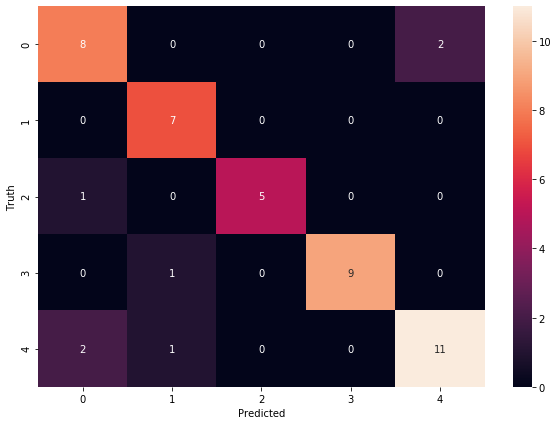

In [58]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [59]:
class_dict


{'cropped': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}